# Cleaning

In [3]:
import pandas as pd


data = pd.read_csv('survey.csv')

data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

The Gender column contains a variety of responses, including inconsistent and non-standard representations of gender

In [7]:

def clean_gender(gender):
    gender = gender.strip().lower()
    if gender in ['male', 'm', 'male-ish', 'maile', 'mal', 'make', 'male (cis)', 'man', 'cis male', 'male ', 'msle', 'malr', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'cis female', 'woman', 'femake', 'female (cis)', 'female (trans)', 'femail', 'female ']:
        return 'Female'
    else:
        return 'Non-binary/Other'


data['Gender'] = data['Gender'].apply(clean_gender)


data['Gender'].value_counts()


Gender
Male                990
Female              248
Non-binary/Other     21
Name: count, dtype: int64

Now let's clean the age column by filtering out any outliers (such as unrealistic ages)

In [8]:
data = data[(data['Age'] >= 18) & (data['Age'] <= 100)]


data['Age'].describe()


count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

# Analysis

## Distribution of mental health conditions among different age groups.

C:\Users\d1411\AppData\Local\Temp\ipykernel_13064\1207078485.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_distribution = data.groupby('age_group')['treatment'].value_counts(normalize=True).unstack()


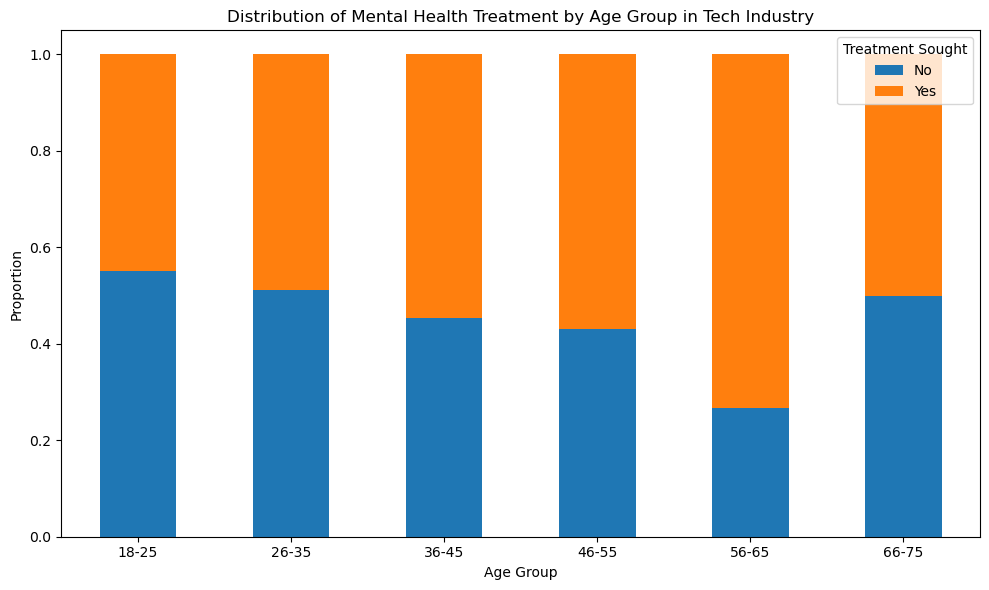

In [9]:

# Create age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the distribution of people who sought treatment by age group
age_group_distribution = data.groupby('age_group')['treatment'].value_counts(normalize=True).unstack()


import matplotlib.pyplot as plt

age_group_distribution.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Distribution of Mental Health Treatment by Age Group in Tech Industry")
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.legend(title="Treatment Sought", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Frequency of mental health issues by gender.

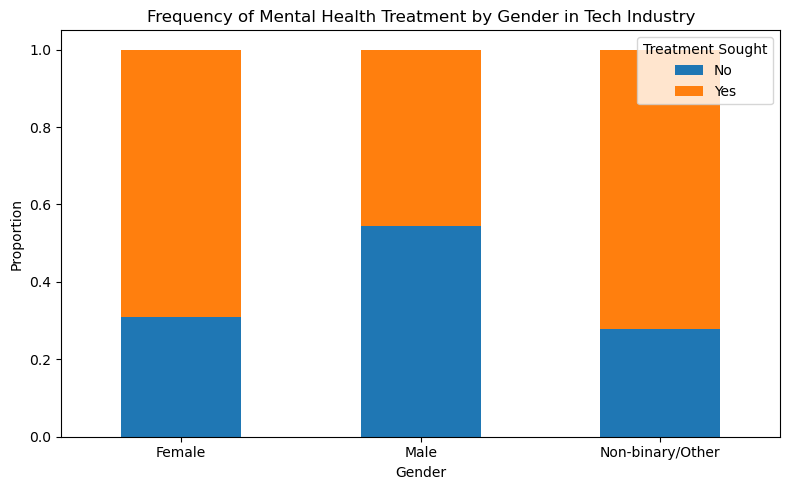

In [10]:
# Analyzing the frequency of mental health issues by gender
# We'll use the 'treatment' column again as a proxy for mental health issues

gender_distribution = data.groupby('Gender')['treatment'].value_counts(normalize=True).unstack()

# Visualize the distribution
gender_distribution.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Frequency of Mental Health Treatment by Gender in Tech Industry")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.legend(title="Treatment Sought", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Countries with the highest and lowest reported rates of mental health issues.

In [12]:
country_distribution = data.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Sort by the proportion of people seeking treatment and take the top and bottom 5 countries
highest_countries = country_distribution['Yes'].sort_values(ascending=False).head(5)
lowest_countries = country_distribution['Yes'].sort_values(ascending=False).tail(5)


In [13]:
highest_countries

Country
Japan       1.0
Croatia     1.0
Slovenia    1.0
Moldova     1.0
Denmark     1.0
Name: Yes, dtype: float64

In these countriese 100% of respondents reporting treatment!

In [14]:
lowest_countries

Country
Greece            0.0
Georgia           0.0
Czech Republic    0.0
China             0.0
Uruguay           0.0
Name: Yes, dtype: float64

In these countriese 0% of respondents reporting treatment!!